# TP Ciencia de datos - Grupo 4 - 2019 


#### Alumnos: Herman, Luka / Prchal, Leandro

###### Mentor: Magallanes, Hernan

Temario

1.  Seleccion de Data Set y Dimensionamiento
 
 
2.  Analisis Exploratorio de Datos (EDA)


3. Reduccion de muestra para aplicarcion de ML


4. Aplicacion de Aprendisaje supervisado : SVM con Cross Validation + KNN

# 1 - Seleccion de Data Set (EcoBicis 2018 - GCBA) y Dimensionamiento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import preprocessing

In [2]:
bicis = pd.read_csv(r'C:\Users\Leandro\Desktop\UTN\Ciencia de Datos\TP Bicicletas publicas\recorridos-realizados-2018.csv', delimiter=',')

In [3]:
np.shape(bicis)

(2619968, 9)

In [4]:
bicis.head()

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
0,5453,2018-01-01 00:08:05,0 days 00:19:53.000000000,Uruguay,45,Virrey Cevallos,183,M,45
1,673,2018-01-01 00:18:05,0 days 00:26:19.000000000,Posadas,189,Guardia Vieja,110,M,61
2,179119,2018-01-01 00:20:14,0 days 00:27:39.000000000,Hospital Rivadavia,50,Padilla,31,F,52
3,400147,2018-01-01 00:20:22,0 days 00:48:51.000000000,Macacha Güemes,111,Acuña de Figueroa,54,M,27
4,400156,2018-01-01 00:20:31,0 days 00:49:27.000000000,Macacha Güemes,111,Acuña de Figueroa,54,F,27



# 2 - Analisis Exploratorio de Datos (EDA)

In [5]:
columnas_bicis = bicis.columns
columnas_bicis

Index(['bici_id_usuario', 'bici_Fecha_hora_retiro', 'bici_tiempo_uso',
       'bici_nombre_estacion_origen', 'bici_estacion_origen',
       'bici_nombre_estacion_destino', 'bici_estacion_destino', 'bici_sexo',
       'bici_edad'],
      dtype='object')

In [6]:
# Busqueda de Nans
col_NaN = bicis.isnull().any()
print(col_NaN,'\r\n')

bici_id_usuario                 False
bici_Fecha_hora_retiro          False
bici_tiempo_uso                  True
bici_nombre_estacion_origen     False
bici_estacion_origen            False
bici_nombre_estacion_destino    False
bici_estacion_destino           False
bici_sexo                       False
bici_edad                       False
dtype: bool 



In [7]:
# Se elimnan los Nans
bicis.dropna(how ='any', inplace = True)

In [8]:
# Tamaño de muestra despues de eliminar los nulls
np.shape(bicis)

(2576245, 9)

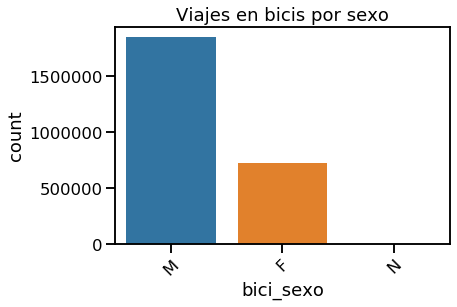

In [9]:
# Se grafica Cantidad de viajes por sexo
sns.set_context("talk")
az = sns.countplot(x="bici_sexo", data=bicis)
plt.xticks(rotation=45)
plt.title("Viajes en bicis por sexo")
plt.show()

In [10]:
tot = bicis['bici_sexo'].count()
tot = int(tot)
tot

2576245

In [11]:
leSexo = preprocessing.LabelEncoder()
bicis['bici_sexo'] = leSexo.fit_transform(bicis['bici_sexo'])
# 1 es Masculino, 0 es Femenino y 2 es No definido
bicis['bici_sexo'].head()

0    1
1    1
2    0
3    1
4    0
Name: bici_sexo, dtype: int32

In [12]:
bicis['bici_sexo'].value_counts()

1    1850204
0     725973
2         68
Name: bici_sexo, dtype: int64

In [13]:
Porc_M = (1850204 / tot) *100
Porc_M

71.81785893810564

In [14]:
Porc_F = (725973 / tot) *100
Porc_F

28.179501561381002

In [15]:
Porc_N = (68 / tot) *100
Porc_N

0.002639500513344034

In [16]:
# Busco los cuartiles de la edad de los usuarios
bicis['bici_edad'].describe()

count    2.576245e+06
mean     3.324418e+01
std      1.112505e+01
min      1.600000e+01
25%      2.500000e+01
50%      3.000000e+01
75%      3.900000e+01
max      1.400000e+02
Name: bici_edad, dtype: float64

No handles with labels found to put in legend.


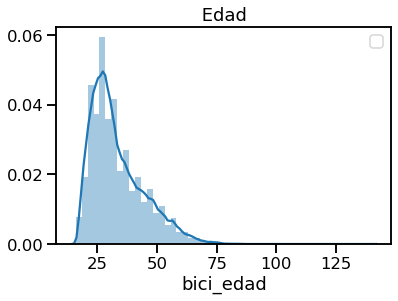

In [17]:
# Grafico distribucion de edad de usuarios
sns.distplot(bicis.bici_edad )
plt.title(" Edad ")
plt.legend()
plt.show()

In [18]:
# Los datos de tiempo de uso estan en formato string -> los paso a formato numerico para poder operarlos
TdU= bicis['bici_tiempo_uso'].str.split("",n=7,expand = True)
TdU.head()

,0,1,2,3,4,5,6,7
0,,0,,d,a,y,s,00:19:53.000000000
1,,0,,d,a,y,s,00:26:19.000000000
2,,0,,d,a,y,s,00:27:39.000000000
3,,0,,d,a,y,s,00:48:51.000000000
4,,0,,d,a,y,s,00:49:27.000000000


In [19]:
minutos = TdU.iloc[:,7].str.slice(4,6,1).astype(int)
horas = TdU.iloc[:,7].str.slice(0,3,1).astype(int)
mins_tot = horas*60 + minutos

In [20]:
#Muestro todos los tiempos de uso expresados en minutos totales por viaje
mins_tot.head()

0    19
1    26
2    27
3    48
4    49
Name: 7, dtype: int32

In [21]:
mins_tot.describe()

count    2.576245e+06
mean     2.527956e+01
std      2.286918e+01
min      5.000000e+00
25%      1.100000e+01
50%      1.800000e+01
75%      3.000000e+01
max      1.800000e+02
Name: 7, dtype: float64

No handles with labels found to put in legend.


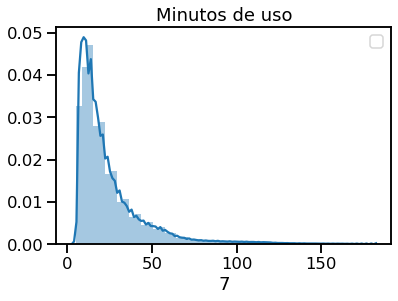

In [22]:
# Grafico distribucion de minutos de uso por viaje
sns.distplot(mins_tot)
plt.title("Minutos de uso")
plt.legend()
plt.show()

In [23]:
# Los datos de Hora de Retiro estan en formato string -> los paso a formato numerico para poder operarlos
FdR= bicis['bici_Fecha_hora_retiro'].str.split("",n=11,expand = True)
FdR.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,,2,0,1,8,-,0,1,-,0,1,00:08:05
1,,2,0,1,8,-,0,1,-,0,1,00:18:05
2,,2,0,1,8,-,0,1,-,0,1,00:20:14
3,,2,0,1,8,-,0,1,-,0,1,00:20:22
4,,2,0,1,8,-,0,1,-,0,1,00:20:31


In [24]:
retiro_horas = FdR.iloc[:,11].str.slice(0,3,1).astype(int)
retiro_horas.head()

0    0
1    0
2    0
3    0
4    0
Name: 11, dtype: int32

In [25]:
bicis_v2 = bicis.join(retiro_horas)
bicis_v3 = bicis_v2.join(mins_tot)
bicis_v3.head()

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,11,7
0,5453,2018-01-01 00:08:05,0 days 00:19:53.000000000,Uruguay,45,Virrey Cevallos,183,1,45,0,19
1,673,2018-01-01 00:18:05,0 days 00:26:19.000000000,Posadas,189,Guardia Vieja,110,1,61,0,26
2,179119,2018-01-01 00:20:14,0 days 00:27:39.000000000,Hospital Rivadavia,50,Padilla,31,0,52,0,27
3,400147,2018-01-01 00:20:22,0 days 00:48:51.000000000,Macacha Güemes,111,Acuña de Figueroa,54,1,27,0,48
4,400156,2018-01-01 00:20:31,0 days 00:49:27.000000000,Macacha Güemes,111,Acuña de Figueroa,54,0,27,0,49


In [26]:
# Se elimina la columna Bici_tiempo_uso
del bicis_v3['bici_tiempo_uso']

In [27]:
# Se elimina la columna bici_Fecha_hora_retiro
del bicis_v3['bici_Fecha_hora_retiro']

In [28]:
# Rename de las columnas 
bicis_v3.columns = ['bici_id_usuario','bici_nombre_estacion_origen','bici_estacion_origen',
                     'bici_nombre_estacion_destino','bici_estacion_destino','bici_sexo','bici_edad',"Hora_retiro","Tiempo_uso"]

In [29]:
bicis_v3.head()

,bici_id_usuario,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,Hora_retiro,Tiempo_uso
0,5453,Uruguay,45,Virrey Cevallos,183,1,45,0,19
1,673,Posadas,189,Guardia Vieja,110,1,61,0,26
2,179119,Hospital Rivadavia,50,Padilla,31,0,52,0,27
3,400147,Macacha Güemes,111,Acuña de Figueroa,54,1,27,0,48
4,400156,Macacha Güemes,111,Acuña de Figueroa,54,0,27,0,49


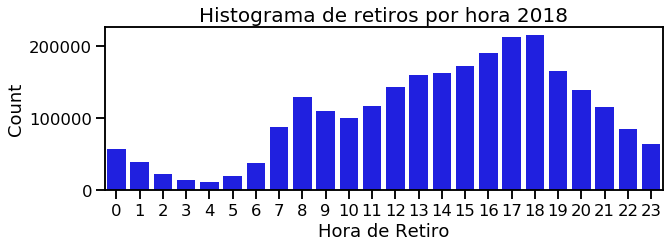

In [30]:
plt.figure(figsize=(10,3))
sns.countplot(bicis_v3.Hora_retiro, color="Blue")
plt.xlabel("Hora de Retiro")
plt.title('Histograma de retiros por hora 2018',size = 20)
plt.ylabel("Count")
plt.show()


### Definimos bandas de Tiempos de Uso / Edad / Franja horaria de Retiro

In [31]:
# Bandas de Tiempo de Uso
bicis_v3.loc[(bicis_v3['Tiempo_uso'] >= 0) & (bicis_v3['Tiempo_uso'] <= 15), 'DuracionViaje']   = 'Corta duracion'
bicis_v3.loc[(bicis_v3['Tiempo_uso'] > 15) & (bicis_v3['Tiempo_uso'] <= 30), 'DuracionViaje']   = 'Media duracion'
bicis_v3.loc[(bicis_v3['Tiempo_uso'] > 30) & (bicis_v3['Tiempo_uso'] <= 1000), 'DuracionViaje']   = 'Larga duracion'

In [32]:
DuracionViaje_Media = bicis_v3[['DuracionViaje', 'Tiempo_uso']].groupby(['DuracionViaje'], as_index=False).mean()
DuracionViaje_Media

,DuracionViaje,Tiempo_uso
0,Corta duracion,10.582560
1,Larga duracion,55.780803
2,Media duracion,21.657222


In [33]:
DuracionViaje_Cantidad = bicis_v3[['DuracionViaje', 'Tiempo_uso']].groupby(['DuracionViaje'], as_index=False).count()
DuracionViaje_Cantidad

,DuracionViaje,Tiempo_uso
0,Corta duracion,1096598
1,Larga duracion,629374
2,Media duracion,850273


In [34]:
# Bandas de Edad
bicis_v3.loc[(bicis_v3['bici_edad'] >= 0) & (bicis_v3['bici_edad'] <= 18), 'GrupoEdad'] = 'Menor de Edad'
bicis_v3.loc[(bicis_v3['bici_edad'] > 18) & (bicis_v3['bici_edad'] <= 35), 'GrupoEdad']   = 'Adulto Joven'
bicis_v3.loc[(bicis_v3['bici_edad'] > 35) & (bicis_v3['bici_edad'] <= 65), 'GrupoEdad']   = 'Adulto Mayor'
bicis_v3.loc[(bicis_v3['bici_edad'] > 65) & (bicis_v3['bici_edad'] <= 150), 'GrupoEdad']   = 'Jubilados'

In [35]:
GrupoEdad_Cantidad = bicis_v3[['GrupoEdad', 'bici_edad']].groupby(['GrupoEdad'], as_index=False).count()
GrupoEdad_Cantidad

,GrupoEdad,bici_edad
0,Adulto Joven,1662581
1,Adulto Mayor,837328
2,Jubilados,25839
3,Menor de Edad,50497


In [36]:
GrupoEdad_TdU = bicis_v3[['GrupoEdad', "Tiempo_uso"]].groupby(['GrupoEdad'], as_index=False).mean()
GrupoEdad_TdU

,GrupoEdad,Tiempo_uso
0,Adulto Joven,24.949375
1,Adulto Mayor,25.598123
2,Jubilados,31.990170
3,Menor de Edad,27.434818


In [37]:
# Bandas Franjas Horarias de Retiro de Bicicleta
bicis_v3.loc[(bicis_v3['Hora_retiro'] >= 0) & (bicis_v3['Hora_retiro'] <= 6), 'FranjaRetiro'] = 'Madrugada'
bicis_v3.loc[(bicis_v3['Hora_retiro'] > 6) & (bicis_v3['Hora_retiro'] <= 12), 'FranjaRetiro']   = 'Mañana'
bicis_v3.loc[(bicis_v3['Hora_retiro'] > 12) & (bicis_v3['Hora_retiro'] <= 18), 'FranjaRetiro']   = 'Tarde'
bicis_v3.loc[(bicis_v3['Hora_retiro'] > 18) & (bicis_v3['Hora_retiro'] <= 25), 'FranjaRetiro']   = 'Noche'

In [38]:
FranjaHoraria_Retiro = bicis_v3[['FranjaRetiro', "Hora_retiro"]].groupby(['FranjaRetiro'], as_index=False).count()
FranjaHoraria_Retiro

,FranjaRetiro,Hora_retiro
0,Madrugada,204500
1,Mañana,686602
2,Noche,569866
3,Tarde,1115277


In [39]:
bicis_v3.head()

,bici_id_usuario,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,Hora_retiro,Tiempo_uso,DuracionViaje,GrupoEdad,FranjaRetiro
0,5453,Uruguay,45,Virrey Cevallos,183,1,45,0,19,Media duracion,Adulto Mayor,Madrugada
1,673,Posadas,189,Guardia Vieja,110,1,61,0,26,Media duracion,Adulto Mayor,Madrugada
2,179119,Hospital Rivadavia,50,Padilla,31,0,52,0,27,Media duracion,Adulto Mayor,Madrugada
3,400147,Macacha Güemes,111,Acuña de Figueroa,54,1,27,0,48,Larga duracion,Adulto Joven,Madrugada
4,400156,Macacha Güemes,111,Acuña de Figueroa,54,0,27,0,49,Larga duracion,Adulto Joven,Madrugada


In [40]:
# Muestro la nueva dimension de mi muestra
np.shape(bicis_v3)

(2576245, 12)


### BoxPlot para identificar outliers + Descarte de outliers (Edad > 90 años )

Text(0.5, 1.0, 'Edad de usuarios')

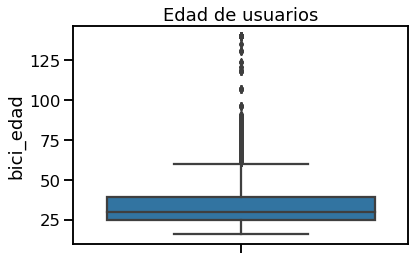

In [41]:
ax = sns.boxplot(y = bicis_v3["bici_edad"])
plt.title("Edad de usuarios")

In [42]:
# Eliminamos outliers mayores a 90 años.

bicis_v3 = bicis_v3.drop(bicis_v3[bicis_v3['bici_edad'] >= 90].index)
np.shape(bicis_v3)

(2576138, 12)

Text(0.5, 1.0, 'Edad de usuarios sin outliers')

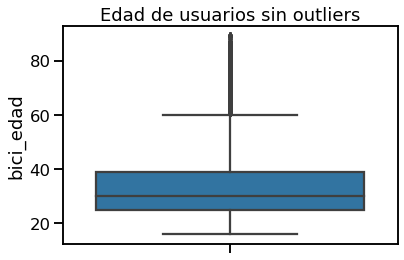

In [43]:
ax = sns.boxplot(y = bicis_v3["bici_edad"])
plt.title("Edad de usuarios sin outliers")


### Se muestra correlacion lineal entre las features del Data Set

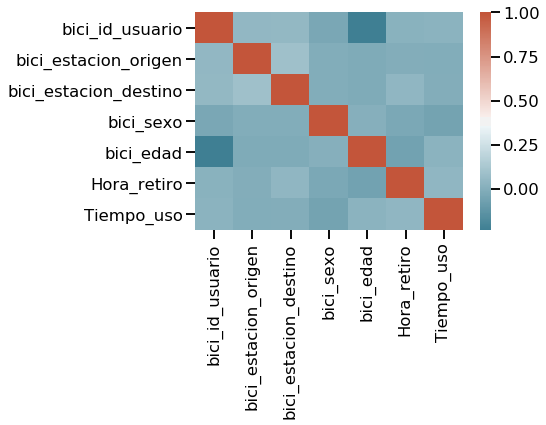

In [44]:
corrmat = bicis_v3.corr()
p =sns.heatmap(corrmat, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [45]:
# Vemos como quedo la Muestra
bicis_v3.head()

,bici_id_usuario,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,Hora_retiro,Tiempo_uso,DuracionViaje,GrupoEdad,FranjaRetiro
0,5453,Uruguay,45,Virrey Cevallos,183,1,45,0,19,Media duracion,Adulto Mayor,Madrugada
1,673,Posadas,189,Guardia Vieja,110,1,61,0,26,Media duracion,Adulto Mayor,Madrugada
2,179119,Hospital Rivadavia,50,Padilla,31,0,52,0,27,Media duracion,Adulto Mayor,Madrugada
3,400147,Macacha Güemes,111,Acuña de Figueroa,54,1,27,0,48,Larga duracion,Adulto Joven,Madrugada
4,400156,Macacha Güemes,111,Acuña de Figueroa,54,0,27,0,49,Larga duracion,Adulto Joven,Madrugada



### Se busca el Top 15 de Estaciones por cantidad de viajes segun origen y destino

In [46]:
# Buscamos Top 15 estaciones de origen
top15_origen = bicis.bici_nombre_estacion_origen.value_counts().head(15)
top15_origen

Facultad de Medicina       38382
Pacífico                   36163
Parque Las Heras           35846
Plaza Italia               32010
Retiro III                 30326
Parque Centenario          29203
Facultad de Derecho        27535
Congreso                   27059
Godoy Cruz y Libertador    25454
Vera Peñaloza              24876
Ecuador                    24863
Once II                    24179
Ayacucho                   23777
Billinghurst               23621
Virrey Cevallos            22974
Name: bici_nombre_estacion_origen, dtype: int64

In [47]:
# Buscamos Top 15 estaciones de destino
top15_destino = bicis.bici_nombre_estacion_destino.value_counts().head(15)
top15_destino

Facultad de Medicina       38613
Pacífico                   35830
Parque Las Heras           33762
Parque Centenario          29186
Plaza Italia               28177
Retiro III                 27555
Congreso                   27380
Facultad de Derecho        26474
Vera Peñaloza              25292
Godoy Cruz y Libertador    24920
Ecuador                    24602
Ayacucho                   23780
Billinghurst               23762
Virrey Cevallos            23132
Carlos Calvo               23051
Name: bici_nombre_estacion_destino, dtype: int64

## Mapa Estaciones Ecobicis
### Usamos un segundo DataSet (Estaciones-Bicicletas de GCBA)

In [48]:
estaciones = pd.read_csv(r'C:\Users\Leandro\Desktop\UTN\Ciencia de Datos\TP Bicicletas publicas\estaciones-bicicletas.csv', delimiter=',')

In [49]:
estaciones.head()

,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio
0,-34.592423,-58.374715,002 - Retiro I,2,20,"Ramos Mejia, Jose Maria, Dr. Av. y Del Liberta...","Ramos Mejia, Jose Maria, Dr. Av.",NaN,Del Libertador Av.,Retiro
1,-34.611032,-58.368260,003 - ADUANA,3,20,Moreno y Paseo Colon Av.,Moreno,NaN,Paseo Colon Av.,Monserrat
2,-34.601726,-58.368763,004 - Plaza Roma,4,20,Lavalle y Bouchard,Lavalle,NaN,Bouchard,San Nicolas
3,-34.580550,-58.420954,005 - Plaza Italia,5,42,Sarmiento Av. 2601,Sarmiento Av.,2601.0,NaN,Palermo
4,-34.628526,-58.369758,006 - Parque Lezama,6,20,"Garcia, Martin Av. 295","Garcia, Martin Av.",295.0,NaN,San Telmo


In [50]:
np.shape(estaciones)

(396, 10)

In [51]:
# Mostramos la cantidad de estaciones por barrio
estaciones.barrio.value_counts()

Palermo                39
San Nicolas            28
Belgrano               27
Caballito              24
Recoleta               21
Balvanera              20
Flores                 19
Monserrat              17
Almagro                16
Retiro                 12
Villa Crespo           12
Puerto Madero          11
Parque Chacabuco       10
Nueva Pompeya           9
Barracas                9
Villa Del Parque        9
Parque Patricios        9
Boca                    9
Chacarita               8
Villa Urquiza           8
Nuñez                   7
Colegiales              7
Boedo                   6
San Telmo               6
Coghlan                 5
Villa Ortuzar           5
San Cristobal           5
Floresta                5
Villa General Mitre     5
Paternal                4
Constitucion            4
Agronomia               3
Parque Chas             3
Saavedra                3
Villa Santa Rita        3
Villa Soldati           2
Devoto                  2
Parque Avellaneda       2
Velez Sarfie

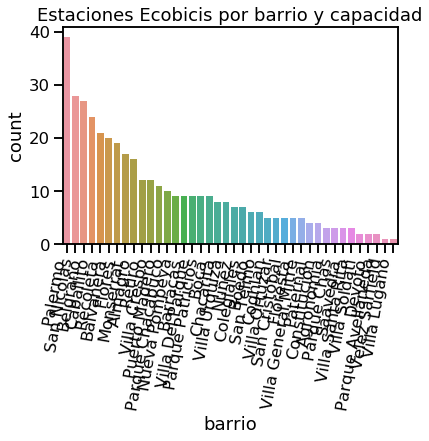

In [52]:
ax2 = sns.countplot(x="barrio", data=estaciones , order=estaciones.barrio.value_counts().index)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=80, ha="right" );
plt.title('Estaciones Ecobicis por barrio y capacidad')
plt.show()

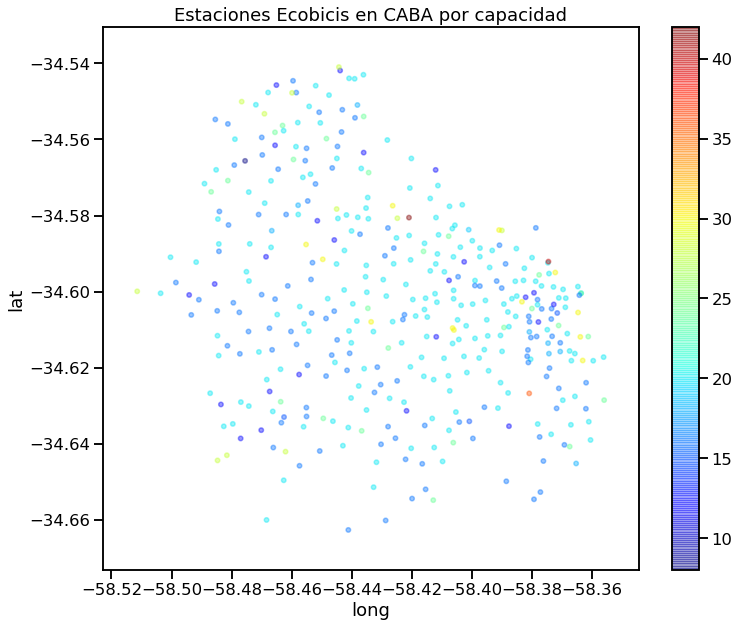

In [53]:
# Graficamos segun su ubicacion geografica (latitud y Longitud)

estaciones.plot(kind="scatter",  x="long", y="lat", alpha=0.4, figsize=(12,10),
                          c=estaciones["capacidad"],
                          cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('Estaciones Ecobicis en CABA por capacidad')
plt.show()

# 3 - Reduccion de muestra para aplicacion de ML

### Se reduce la muestra al 1% para poder aplicar Machine Learning : Aprendizaje Supervisado

##### --> Se reduce basandose en la distribucion de la banda calculada: GrupoEdad

In [54]:
a = pd.DataFrame(bicis_v3['GrupoEdad'])

In [55]:
tot_a = pd.DataFrame.count(a) 
tot_a = int(tot_a)
tot_a

2576138

In [56]:
b1 = GrupoEdad_Cantidad.loc[GrupoEdad_Cantidad['GrupoEdad'] == 'Menor de Edad'].bici_edad
b = int(b1)
b = np.round((b1/tot_a)*100 , 2)
b = float(b)

In [57]:
c1 = GrupoEdad_Cantidad.loc[GrupoEdad_Cantidad['GrupoEdad'] == 'Adulto Joven'].bici_edad
c = int(c1)
c = np.round((c1/tot_a)*100 , 2)
c = float(c)

In [58]:
d1 = GrupoEdad_Cantidad.loc[GrupoEdad_Cantidad['GrupoEdad'] == 'Adulto Mayor'].bici_edad
d = int(d1)
d = np.round((d1/tot_a)*100 , 2)
d = float(d)

In [59]:
e1 = GrupoEdad_Cantidad.loc[GrupoEdad_Cantidad['GrupoEdad'] == 'Jubilados'].bici_edad
e = int(e1)
e = np.round((e1/tot_a)*100 , 2)
e = float(e)

In [60]:
s = [0]*4
s[0] = b
s[1] = c
s[2] = d
s[3] = e
Porc_GE = pd.DataFrame({'Rango Edad':['Adulto Joven','Adulto Mayor','Jubilados','Menor de Edad'], 'Porcentaje':[c,d,e,b]})
Porc_GE

,Rango Edad,Porcentaje
0,Adulto Joven,64.54
1,Adulto Mayor,32.50
2,Jubilados,1.00
3,Menor de Edad,1.96


In [61]:
Porc_GE2 = pd.concat([GrupoEdad_Cantidad['GrupoEdad'],GrupoEdad_Cantidad['bici_edad'],Porc_GE], axis=1,
              keys=['GrupoEdad','bici_edad','Porcentaje GE'])
Porc_GE2.head()

GrupoEdad bici_edad  Porcentaje GE           
       GrupoEdad bici_edad     Rango Edad Porcentaje
0   Adulto Joven   1662581   Adulto Joven      64.54
1   Adulto Mayor    837328   Adulto Mayor      32.50
2      Jubilados     25839      Jubilados       1.00
3  Menor de Edad     50497  Menor de Edad       1.96

In [62]:
Porc_GE2["GrupoEdad"]

,GrupoEdad
0,Adulto Joven
1,Adulto Mayor
2,Jubilados
3,Menor de Edad


In [63]:
Porc_GE2["Porcentaje GE"]['Porcentaje']

0    64.54
1    32.50
2     1.00
3     1.96
Name: Porcentaje, dtype: float64


#### Grafico de Torta con distribucion de uso por banda etaria

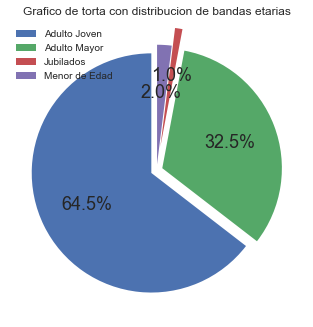

In [64]:
slices = Porc_GE2["Porcentaje GE"]['Porcentaje']
labels=["Adulto Joven", "Adulto Mayor", "Jubilados", "Menor de Edad"]

explode = [0.05,0.05,0.2,0.05]

plt.style.use('seaborn')
plt.pie(slices, explode=explode, 
        startangle=90, autopct='%1.1f%%'
         )
plt.title("Grafico de torta con distribucion de bandas etarias")
plt.legend(labels, loc='best')
plt.show()

### Porcentaje a cortar para aplicar Machine Learning (SVM y KNN) = 1% de la muestra total

In [65]:
p = 0.01

In [66]:
b2 = np.round(GrupoEdad_Cantidad.loc[GrupoEdad_Cantidad['GrupoEdad']== 'Menor de Edad'].bici_edad * p) 
b2 = int(b2)
b2

505

In [67]:
b3 = bicis_v3.loc[bicis_v3['GrupoEdad'] == 'Menor de Edad']

Menor_de_Edad_corte = b3.iloc[0:b2,:]

Menor_de_Edad_corte.head()

,bici_id_usuario,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,Hora_retiro,Tiempo_uso,DuracionViaje,GrupoEdad,FranjaRetiro
20,463534,Maipú,36,Sánchez de Bustamante,52,0,18,0,19,Media duracion,Menor de Edad,Madrugada
52,316451,Plaza Güemes,25,Billinghurst y Valentin Gomez,143,1,18,1,11,Corta duracion,Menor de Edad,Madrugada
98,288956,Fitz Roy,101,Armenia y Gorriti,142,1,18,3,42,Larga duracion,Menor de Edad,Madrugada
152,370504,Urquiza,41,Treinta y tres orientales,49,1,18,5,119,Larga duracion,Menor de Edad,Madrugada
210,316451,Peron y F. Acuña de Figueroa,194,Plaza Güemes,25,1,18,7,16,Media duracion,Menor de Edad,Mañana


In [68]:
c2 = np.round(GrupoEdad_Cantidad.loc[GrupoEdad_Cantidad['GrupoEdad']== 'Adulto Joven'].bici_edad * p) 
c2 = int(c2)
c2

16626

In [69]:
c3 = bicis_v3.loc[bicis_v3['GrupoEdad'] == 'Adulto Joven']

Adulo_Joven_corte = c3.iloc[0:c2,:]
Adulo_Joven_corte.head()

,bici_id_usuario,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,Hora_retiro,Tiempo_uso,DuracionViaje,GrupoEdad,FranjaRetiro
3,400147,Macacha Güemes,111,Acuña de Figueroa,54,1,27,0,48,Larga duracion,Adulto Joven,Madrugada
4,400156,Macacha Güemes,111,Acuña de Figueroa,54,0,27,0,49,Larga duracion,Adulto Joven,Madrugada
5,476733,Yatay,121,Billinghurst y Valentin Gomez,143,0,31,0,36,Larga duracion,Adulto Joven,Madrugada
6,326932,Yatay,121,Billinghurst y Valentin Gomez,143,0,28,0,35,Larga duracion,Adulto Joven,Madrugada
7,347609,Pque. Jose Evaristo Uriburu,155,Cerrito,71,1,27,0,31,Larga duracion,Adulto Joven,Madrugada


In [70]:
d2 = np.round(GrupoEdad_Cantidad.loc[GrupoEdad_Cantidad['GrupoEdad']== 'Adulto Mayor'].bici_edad * p) 
d2 = int(d2)
d2

8373

In [71]:
d3 = bicis_v3.loc[bicis_v3['GrupoEdad'] == 'Adulto Mayor']

Adulo_Mayor_corte = d3.iloc[0:d2,:]
Adulo_Mayor_corte.head()

,bici_id_usuario,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,Hora_retiro,Tiempo_uso,DuracionViaje,GrupoEdad,FranjaRetiro
0,5453,Uruguay,45,Virrey Cevallos,183,1,45,0,19,Media duracion,Adulto Mayor,Madrugada
1,673,Posadas,189,Guardia Vieja,110,1,61,0,26,Media duracion,Adulto Mayor,Madrugada
2,179119,Hospital Rivadavia,50,Padilla,31,0,52,0,27,Media duracion,Adulto Mayor,Madrugada
13,282498,Ministro Carranza,58,Ministro Carranza,58,1,42,0,38,Larga duracion,Adulto Mayor,Madrugada
14,158706,Plaza Italia,5,Armenia y Gorriti,142,1,45,0,9,Corta duracion,Adulto Mayor,Madrugada


In [72]:
e2 = np.round(GrupoEdad_Cantidad.loc[GrupoEdad_Cantidad['GrupoEdad']== 'Jubilados'].bici_edad * p) 
e2 = int(e2)
e2

258

In [73]:
e3 = bicis_v3.loc[bicis_v3['GrupoEdad'] == 'Jubilados']

Jubilados_corte = e3.iloc[0:e2,:]
Jubilados_corte.head()

,bici_id_usuario,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,Hora_retiro,Tiempo_uso,DuracionViaje,GrupoEdad,FranjaRetiro
95,443639,Parque Las Heras,9,Plaza Palermo Viejo,56,1,74,3,27,Media duracion,Jubilados,Madrugada
128,6188,Plaza Güemes,25,Plaza Güemes,25,0,83,4,19,Media duracion,Jubilados,Madrugada
130,59334,Pedro Echague,184,Suipacha,23,1,66,4,23,Media duracion,Jubilados,Madrugada
156,6188,Plaza Monseñor Miguel De Andrea,165,San Luis y Ecuador,170,0,83,5,12,Corta duracion,Jubilados,Madrugada
234,7653,Cementerio de la Recoleta,166,Ministerio de Educacion,174,1,74,8,10,Corta duracion,Jubilados,Mañana


In [74]:
bicis_ML10 = np.concatenate((Menor_de_Edad_corte,Adulo_Joven_corte,Adulo_Mayor_corte,Jubilados_corte), axis=0)
bicis_ML10.shape

(25762, 12)

In [75]:
ML01 = pd.DataFrame(bicis_ML10)
ML01.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,463534,Maipú,36,Sánchez de Bustamante,52,0,18,0,19,Media duracion,Menor de Edad,Madrugada
1,316451,Plaza Güemes,25,Billinghurst y Valentin Gomez,143,1,18,1,11,Corta duracion,Menor de Edad,Madrugada
2,288956,Fitz Roy,101,Armenia y Gorriti,142,1,18,3,42,Larga duracion,Menor de Edad,Madrugada
3,370504,Urquiza,41,Treinta y tres orientales,49,1,18,5,119,Larga duracion,Menor de Edad,Madrugada
4,316451,Peron y F. Acuña de Figueroa,194,Plaza Güemes,25,1,18,7,16,Media duracion,Menor de Edad,Mañana


In [76]:
ML01.columns = ['bici_id_usuario','bici_nombre_estacion_origen','bici_estacion_origen',
                     'bici_nombre_estacion_destino','bici_estacion_destino','bici_sexo','bici_edad',"Hora_retiro","Tiempo_uso","DuracionViaje","GrupoEdad","FranjaRetiro"]

In [77]:
ML01.head()

,bici_id_usuario,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,Hora_retiro,Tiempo_uso,DuracionViaje,GrupoEdad,FranjaRetiro
0,463534,Maipú,36,Sánchez de Bustamante,52,0,18,0,19,Media duracion,Menor de Edad,Madrugada
1,316451,Plaza Güemes,25,Billinghurst y Valentin Gomez,143,1,18,1,11,Corta duracion,Menor de Edad,Madrugada
2,288956,Fitz Roy,101,Armenia y Gorriti,142,1,18,3,42,Larga duracion,Menor de Edad,Madrugada
3,370504,Urquiza,41,Treinta y tres orientales,49,1,18,5,119,Larga duracion,Menor de Edad,Madrugada
4,316451,Peron y F. Acuña de Figueroa,194,Plaza Güemes,25,1,18,7,16,Media duracion,Menor de Edad,Mañana



### Vemos una comparativa de muestra original vs reduccion al 1%

No handles with labels found to put in legend.


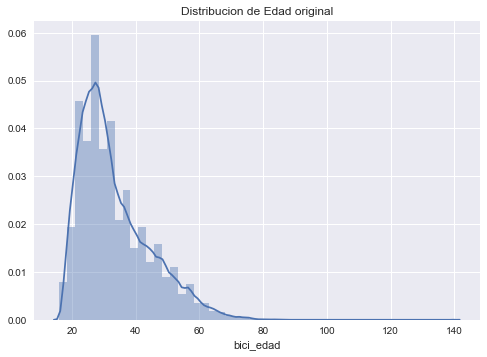

In [78]:
# Grafico distribucion por edad de usuarios en muestra origal
sns.distplot(bicis.bici_edad )
plt.title("Distribucion de Edad original")
plt.legend()
plt.show()

No handles with labels found to put in legend.


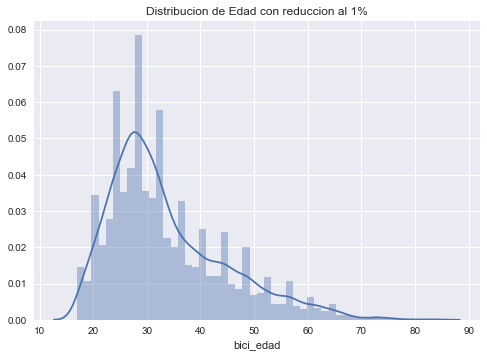

In [79]:
# Grafico distribucion por edad de usuarios en muestra reducida al 1%
sns.distplot(ML01.bici_edad)
plt.title("Distribucion de Edad con reduccion al 1%")
plt.legend()
plt.show()

In [80]:
# Media de la mustra original
bicis['bici_edad'].mean()

33.24418213329866

In [81]:
# Media de la muestra reducida al 1%
ML01['bici_edad'].mean()

33.72952410527133

In [82]:
# Desvio std de la mustra original
bicis['bici_edad'].std()

11.12504772726149

In [83]:
# Desvio std de la muestra reducida al 1%
ML01['bici_edad'].std()

10.99108991182621


# 4 - Aplicacion de Aprendisaje Supervisado: SVM con CV + KNN

### Machine Learning

In [84]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [85]:
# Definimos X e Y para hacer aprendizaje

x = pd.concat([ML01["bici_edad"],ML01["Tiempo_uso"]], axis = 1)
y = ML01["bici_sexo"]

In [86]:
np.shape(x)

(25762, 2)

In [87]:
np.shape(y)

(25762,)

In [88]:
x.head()

,bici_edad,Tiempo_uso
0,18,19
1,18,11
2,18,42
3,18,119
4,18,16


In [89]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: bici_sexo, dtype: object

In [90]:
# Defino un label encoder que transforma las etiquetas de string a INT.
le = preprocessing.LabelEncoder()
# Definimos Y con las etiquetas numericas obtenidas del label encoder
y = le.fit_transform(y)

In [91]:
y

array([0, 1, 1, ..., 1, 1, 1])

### Definimos Train y Test

In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4)

In [93]:
xscaler = preprocessing.StandardScaler().fit(xtrain)
xscaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [94]:
# xtrain_scal tendra el dataset de train pre-procesado con el standard scaler
# xtest_scal tendra el dataset de test pre-procesado con el standard scaler
xtrain_scal = xscaler.transform(xtrain)  
xtest_scal = xscaler.transform(xtest) 

###  Support Vector Machines con Cross Validation

In [95]:
params_svm = {'kernel':['linear', 'rbf'], 'C':[0.1 , 1], 'gamma':[0.01, 0.1]}
svc = svm.SVC(probability=True)
svm_cv = GridSearchCV(svc, param_grid = params_svm, refit = True ,cv = 3)

In [96]:
svm_cv.fit(xtrain_scal, ytrain.ravel())

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1], 'gamma': [0.01, 0.1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [97]:
print("Los mejores parametros son %s con resultado de %0.2f" % (svm_cv.best_params_, svm_cv.best_score_))

Los mejores parametros son {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'} con resultado de 0.73


In [98]:
ypred_svm=svm_cv.predict(xtrain_scal)
train_acc_svm=accuracy_score(ytrain, ypred_svm)
print("El accuracy train con SVM es " + str(train_acc_svm))
ypred2_svm=svm_cv.predict(xtest_scal)
test_acc_svm=accuracy_score(ytest, ypred2_svm)
print("El accuracy test con SVM es " + str(test_acc_svm))

El accuracy train con SVM es 0.7252259746021184
El accuracy test con SVM es 0.7299780049165481


#### Matriz de confusion SVM

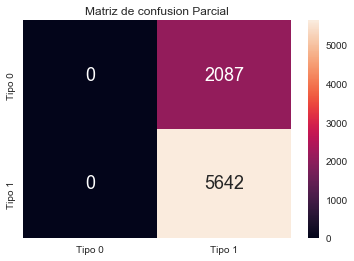

In [99]:
cm_svm = confusion_matrix(ytest, ypred2_svm)
cm_svm2 = pd.DataFrame(cm_svm, index = ['Tipo 0', 'Tipo 1'], columns = ['Tipo 0', 'Tipo 1'])
plt.figure(figsize = (6,4))
sns.heatmap(cm_svm2, annot=True , fmt='g')
plt.title('Matriz de confusion Parcial')
plt.show()


### K-Nearest-Neighbor

In [100]:
# Defino modelo KNN llamado "neigh" y le asigno el hiper-parametro n_neighbors = 5
neigh = KNeighborsClassifier(n_neighbors=5)

In [101]:
neigh.fit(xtrain_scal, ytrain.ravel()) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [102]:
ypred = neigh.predict(xtest_scal)

In [103]:
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.6762841247250615



#### Matriz de confusion KNN

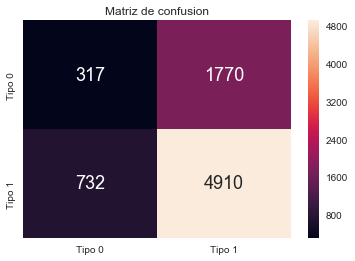

In [104]:
cm_knn = confusion_matrix(ytest, ypred)
cm_knn2 = pd.DataFrame(cm_knn, index = ['Tipo 0', 'Tipo 1'], columns = ['Tipo 0', 'Tipo 1'])
plt.figure(figsize = (6,4))
sns.heatmap(cm_knn2, annot=True , fmt='g')
plt.title('Matriz de confusion')
plt.show()